In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Datasets/austin_weather.csv')
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [4]:
# Convert Date field to DateTime
df.Date = pd.to_datetime(df.Date)
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


Plot the complete set of average temperature values (df.TempAvgF) with Date on the x axis.

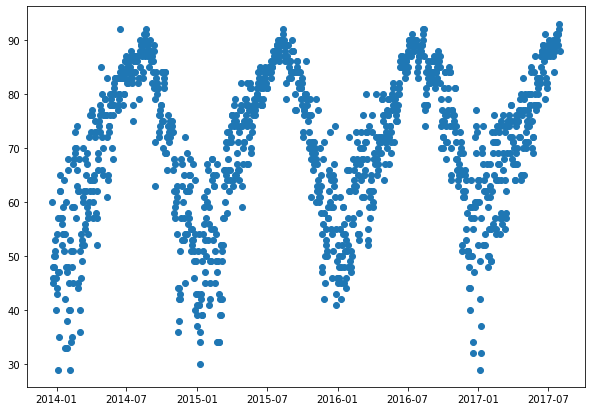

In [7]:
fig, ax = plt.subplots(figsize = (10, 7))

plt.scatter(df.Date, df.TempAvgF)

plt.show()

Construct an autocorrelation plot to see whether the average temperature can be used with an autoregression model.

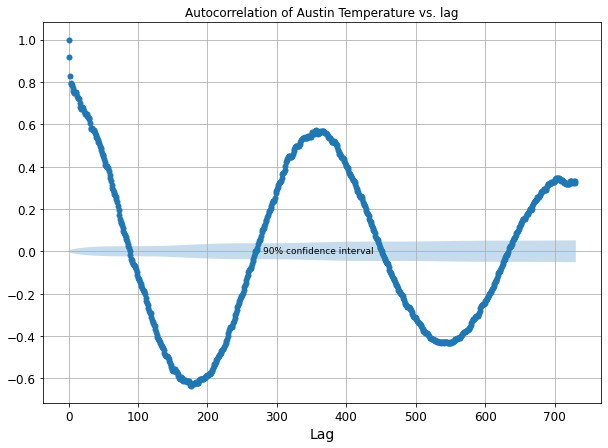

In [17]:
max_lag = 730

fig, ax = plt.subplots(figsize = (10, 7))

plot_acf(
    x = df.TempAvgF,
    ax = ax,
    lags = max_lag,
    alpha = 0.9,
    use_vlines = False,
    title = 'Autocorrelation of Austin Temperature vs. lag'
)

ax.grid(True)
ax.text(280, -0.01, '90% confidence interval', fontsize = 9)
ax.set_xlabel('Lag', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)

plt.show()

Extract the actual ACF values using the numpy.correlate() function

In [18]:
corr0 = np.correlate(df.TempAvgF[0: ] - 
                     df.TempAvgF.mean(), 
                     df.TempAvgF[0: ] - 
                     df.TempAvgF.mean(), 
                     mode = 'valid')
corrs = [np.correlate(df.TempAvgF[:(df.TempAvgF.shape[0] - i)] - 
                      df.TempAvgF.mean(), 
                      df.TempAvgF[i: ] - 
                      df.TempAvgF.mean(), 
                      mode = 'valid') # i nappal eltolt, (sorok összesen - i) hosszúságú tömbök korrelációja          
         for i in range(max_lag)] / corr0

Use the same plot_lag_grid function to investigate the correlation versus the lag plots at various correlation values. Consider the fact that the raw data obviously repeats on a period of around 365 days, but also that an autocorrelation model might not be effective at such long lags. Look at both short and long lags and understand the data.

In [20]:
#
# utility function to plot out a range of 
# plots depicting self-correlation
#
def plot_lag_grid(series, corrs, 
                  axis_min, axis_max, 
                  num_plots, total_lag,
                  n_rows, n_cols):
    lag_step = int(total_lag / num_plots)
    fig = plt.figure(figsize = (18, 16))
    for i in range(num_plots):
        corr = corrs[lag_step * i]
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.scatter(series, series.shift(lag_step * i))
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_title('lag = ' + str(lag_step * i))
        ax.text(axis_min + 0.05 * (axis_max - axis_min),
                axis_max - 0.05 * (axis_max - axis_min),
                'correlation = ' + str(round(corr[0], 3)))
    fig.tight_layout()
    plt.show()

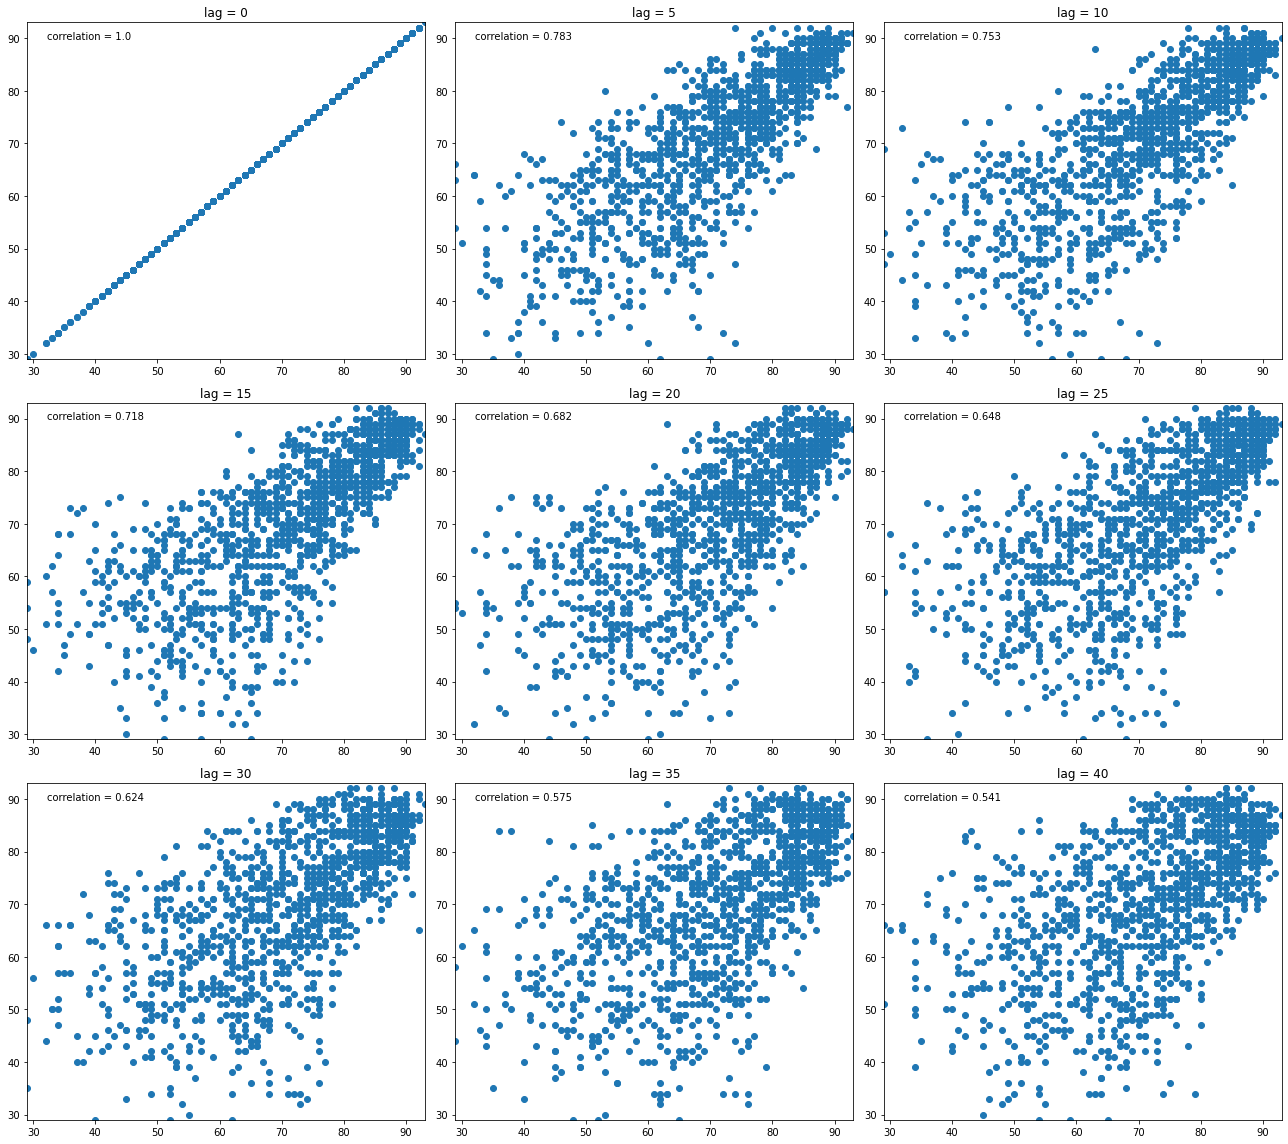

In [23]:
plot_lag_grid(df.TempAvgF, corrs, df.TempAvgF.min(), df.TempAvgF.max(), 9, 45, 3, 3)

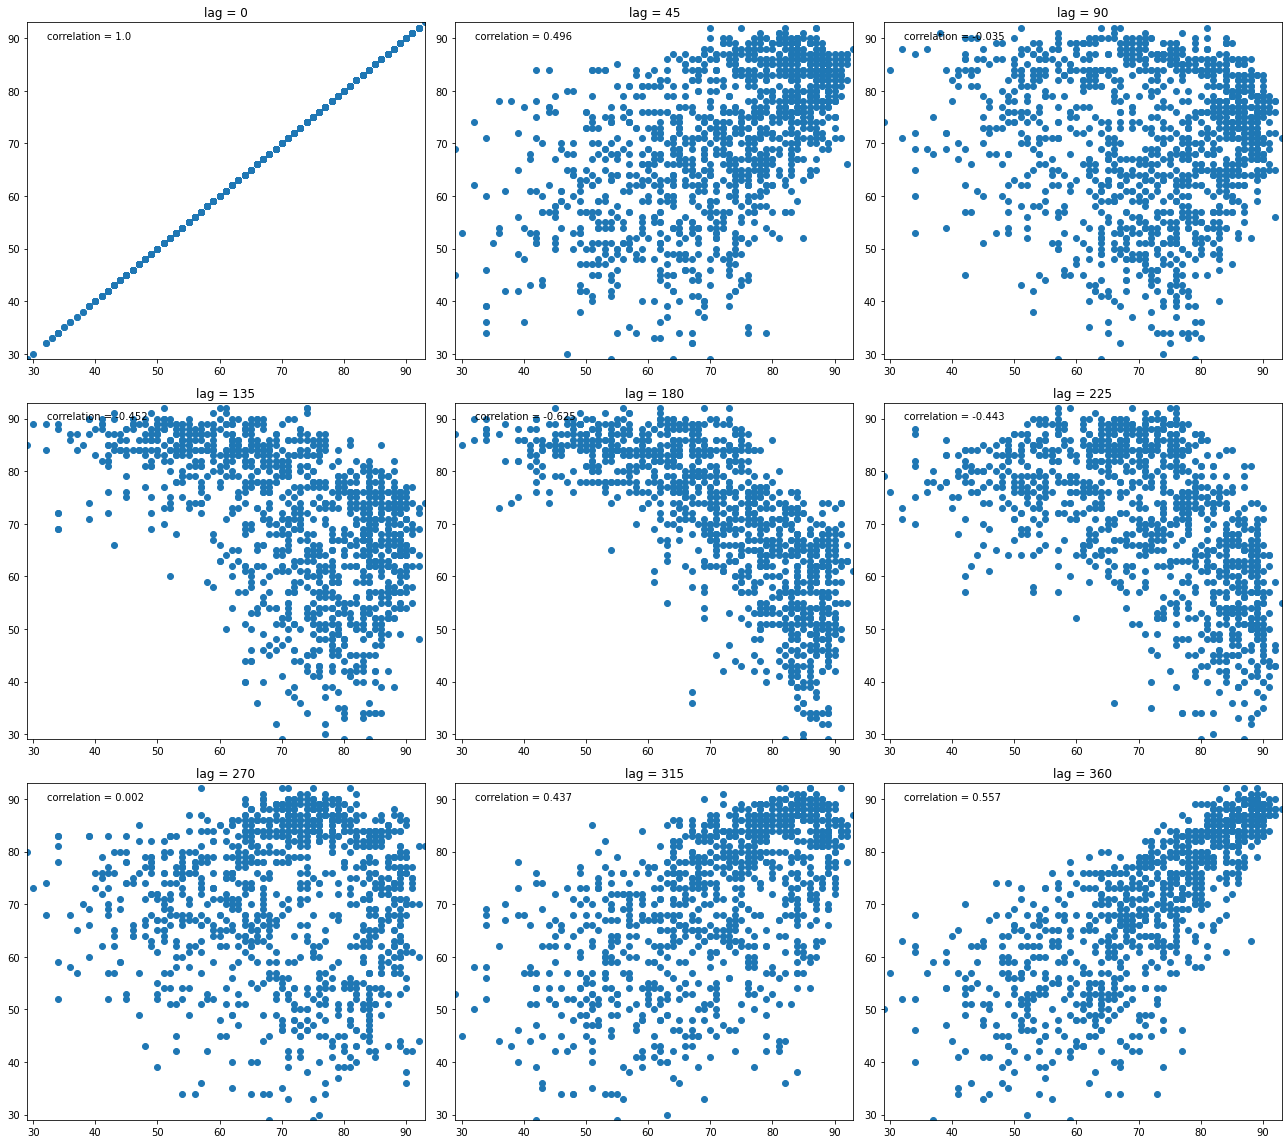

In [25]:
plot_lag_grid(df.TempAvgF, corrs, df.TempAvgF.min(), df.TempAvgF.max(), 9, 405, 3, 3)

Use the statsmodels AR function and the model.fit() method to model the data. Get the maximum model lag from the model.fit() method. Print the coefficients. How many terms are used (by default) in this case?

In [26]:
model = AR(df.TempAvgF)
model_fit = model.fit()
max_lag = model_fit.k_ar

print('Max Lag: {}'.format(max_lag))
print('Coefficients: \n{}'.format(model_fit.params))

Max Lag: 23
Coefficients: 
const           1.909395
L1.TempAvgF     0.912076
L2.TempAvgF    -0.334043
L3.TempAvgF     0.157353
L4.TempAvgF     0.025721
L5.TempAvgF     0.041342
L6.TempAvgF     0.030831
L7.TempAvgF    -0.021230
L8.TempAvgF     0.020324
L9.TempAvgF     0.025147
L10.TempAvgF    0.059739
L11.TempAvgF   -0.017337
L12.TempAvgF    0.043553
L13.TempAvgF   -0.027795
L14.TempAvgF    0.053547
L15.TempAvgF    0.013070
L16.TempAvgF   -0.033157
L17.TempAvgF   -0.000072
L18.TempAvgF   -0.026307
L19.TempAvgF    0.025258
L20.TempAvgF    0.038341
L21.TempAvgF    0.007885
L22.TempAvgF   -0.008889
L23.TempAvgF   -0.011080
dtype: float64


Plot the predictions (including the 365-day forecast), as well as the original dataset.

In [28]:
#
# how far into the future we want to predict
#
max_forecast = 365
#
# generate predictions from the model
#
pred_temp = pd.DataFrame({'pred_temp': 
                           model_fit.predict(start = max_lag,
                                             end = df.shape[0] + 
                                             max_forecast - 1)})
#
# attach the dates for visualization
#
pred_temp['Date'] = df.loc[pred_temp.index, 'Date'].reindex()
pred_temp.loc[(max(df.index) + 1):, 'Date'] = \
    pd.to_datetime([max(df.Date) + 
                    pd.Timedelta(days = i)
                    for i in range(1, max_forecast + 1)])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [27]:
#
# visualize the predictions overlaid on the real data
# as well as the extrapolation to the future
#
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.Date, 
        df.TempAvgF, 
        c = "blue", 
        linewidth = 4,
        label = 'Actual Average Temperature')
ax.plot(pred_temp.loc[0 : len(df.TempAvgF), 'Date'], 
        pred_temp.loc[0 : len(df.TempAvgF), 'pred_temp'], 
        c = "yellow", 
        linewidth = 0.5,
        label = 'Predicted Temperature')
ax.plot(pred_temp.loc[len(df.TempAvgF):, 'Date'], 
        pred_temp.loc[len(df.TempAvgF):, 'pred_temp'], 
        c = "red", 
        linewidth = 2,
        label = 'Forecast Temperature')
ax.set_xlabel('Date', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('Austin Texas Average Daily Temperature')
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend()
plt.show()

NameError: name 'pred_temp' is not defined